# Preprocessing

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import openpyxl

### Loading in the Data Sets

Reading in all the data sets that will be used for this project. Afterwards we check for missing data. One important question we have to think about is if missing data is still valid information or actually something that is useless for us.

In [8]:
df_marine_poll = pd.read_excel('data/20180920_Marine_Pollution.xlsx')

In [9]:
display(df_marine_poll.head(5))
display(df_marine_poll.tail(5))
df_marine_poll.dtypes

,Countries,Chemicals,General garbage,Metals,Oil splillages and leakages,Old fishing gear
0,American Samoa,NaN,2.0,5.0,NaN,NaN
1,Cook Islands,NaN,4.0,NaN,NaN,NaN
2,Fiji,1.0,6.0,5.0,NaN,38.0
3,French Polynesia,NaN,NaN,1.0,NaN,1.0
4,International Waters,3.0,16.0,50.0,NaN,59.0


,Countries,Chemicals,General garbage,Metals,Oil splillages and leakages,Old fishing gear
15,Samoa,NaN,1.0,1.0,NaN,NaN
16,Solomon Islands,6.0,37.0,90.0,NaN,52.0
17,Tokelau,NaN,NaN,8.0,NaN,NaN
18,Tuvalu,2.0,19.0,18.0,NaN,12.0
19,Vanuatu,NaN,1.0,NaN,NaN,19.0


Countries                       object
Chemicals                      float64
General garbage                float64
Metals                         float64
Oil splillages and leakages    float64
Old fishing gear               float64
dtype: object

Countries                       0
Chemicals                      10
General garbage                 3
Metals                          4
Oil splillages and leakages    19
Old fishing gear                5
dtype: int64

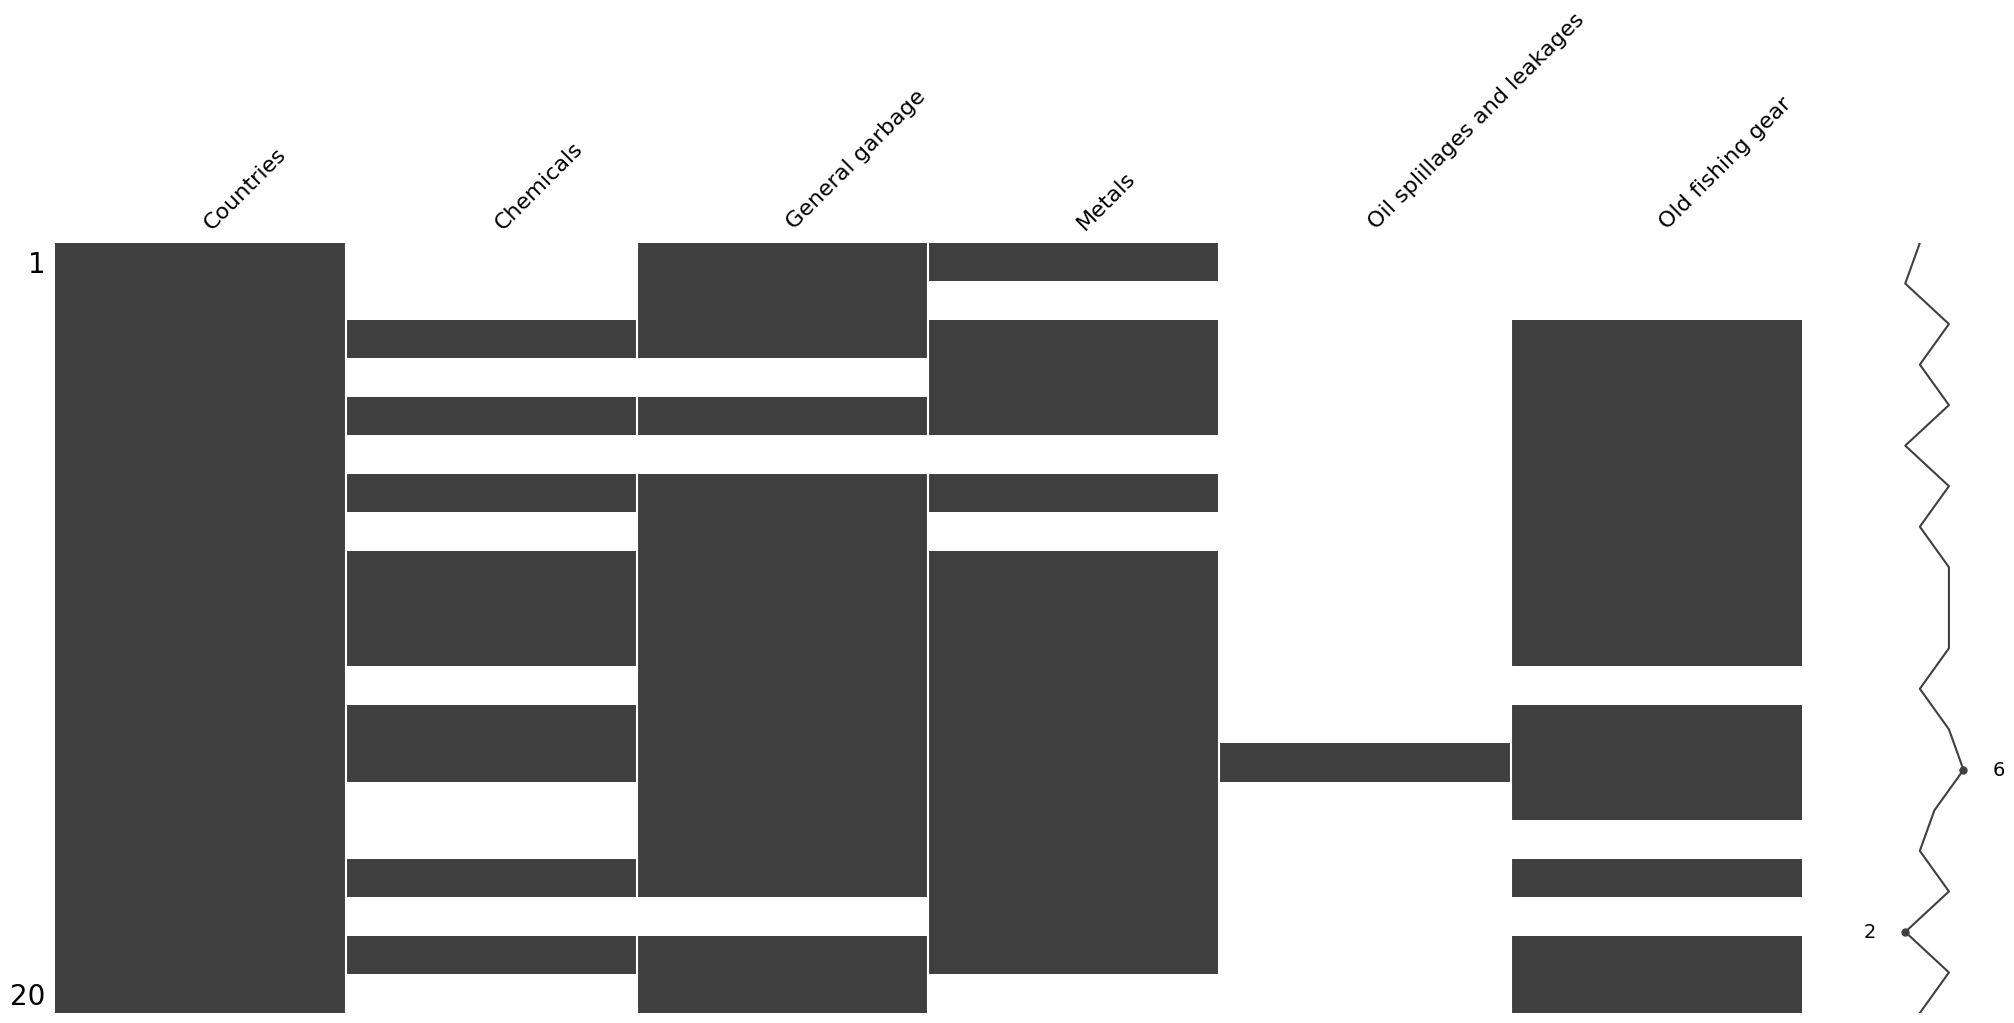

In [10]:
msno.matrix(df_marine_poll)
df_marine_poll.isna().sum()